<a href="https://colab.research.google.com/github/DavideScassola/data_analysis_laboratory/blob/main/notebooks/Prova_Pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova in classe

Ora tocca voi, sulla base del notebook visto in classe provate a creare un albero decisionale per classificare la specie dei pinguini



In [3]:
# Importa le librerie necessarie
import pandas as pd

LINK_DATI = 'https://raw.githubusercontent.com/DavideScassola/data_analysys_laboratory/main/notebooks/dati/penguins.csv'
df = pd.read_csv(LINK_DATI)

# Visualizza le prime righe del DataFrame
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE



*   Prova a descrivere i dati, quali sono le variabili?
*   Cosa potremmo fare con i valori mancanti?


In [4]:
# dimensioni dataset
df.shape

(344, 7)

In [5]:
# Visualizzare il numero di valori mancanti per ogni colonna
valori_mancanti_per_colonna = df.isna().sum()
print("Valori mancanti per colonna:\n", valori_mancanti_per_colonna)

# Eliminare le righe con valori mancanti
df_senza_mancanti = df.dropna()

# Visualizzare il DataFrame senza valori mancanti
print("\nDataFrame senza valori mancanti:\n", df_senza_mancanti)

Valori mancanti per colonna:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

DataFrame senza valori mancanti:
     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222

# EDA

 L'analisi esplorativa dei dati (EDA) è un passo cruciale per comprendere meglio il tuo dataset. Puoi utilizzare diverse librerie Python per condurre l'EDA, come `matplotlib`, `seaborn`, e `pandas`.


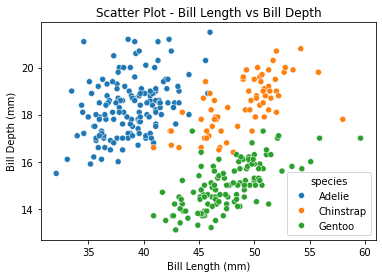

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea uno scatter plot per i valori continui (esempio: 'bill_length_mm' vs 'bill_depth_mm')
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species' , data=df_senza_mancanti)

# Aggiungi titolo e etichette degli assi
plt.title('Scatter Plot - Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# Mostra il grafico
plt.show()

In [7]:
import numpy as np

# Informazioni sul dataset
print("\nInformazioni sul dataset:")
print(df_senza_mancanti.info())

# Statistiche descrittive
print("\nStatistiche descrittive:")
print(df_senza_mancanti.describe())





Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB
None

Statistiche descrittive:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         3

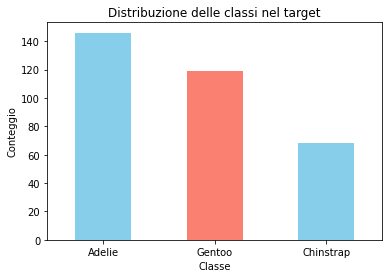

In [8]:

# Distribuzione delle classi nel target
plt.figure(figsize=(6, 4))
df_senza_mancanti['species'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuzione delle classi nel target')
plt.xlabel('Classe')
plt.ylabel('Conteggio')
plt.xticks(rotation=0)
plt.show()


# Divisione in train e test set

La divisione del dataset in un training set e un test set è un passo fondamentale nell'addestramento e nella valutazione di modelli di apprendimento automatico. Questa pratica aiuta a valutare l'efficacia del modello su dati non visti, fornendo una stima delle sue prestazioni su nuovi dati.

In [9]:
# Otteniamo un subset X senza la nostra variabile target
X = df_senza_mancanti.drop(['species','island','sex'],axis=1)
X.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [10]:
# Andiamo a selezionare la variabile che vogliamo classificare etichettandola come y
y = df_senza_mancanti['species']
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [11]:
from sklearn.model_selection import train_test_split


# Suddividere il dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dopo la suddivisione del dataset in training e test set, è importante esaminare la forma (shape) e la distribuzione dei dati in ciascun set. Ciò ti fornirà una visione dettagliata della dimensione dei set e dell'equilibrio delle classi. Di seguito, ti mostro come ottenere queste informazioni utilizzando Python e la libreria pandas.

In [12]:
# Converti array NumPy in oggetti Series di pandas
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Informazioni sulla forma (shape) dei set di addestramento e test
print("Shape del set di addestramento (X_train, y_train):", X_train.shape, y_train_series.shape)
print("Shape del set di test (X_test, y_test):", X_test.shape, y_test_series.shape)

# Distribuzione delle classi nei set di addestramento e test
print("\nDistribuzione delle classi nel set di addestramento:")
print(y_train_series.value_counts(normalize=True))

print("\nDistribuzione delle classi nel set di test:")
print(y_test_series.value_counts(normalize=True))


Shape del set di addestramento (X_train, y_train): (266, 4) (266,)
Shape del set di test (X_test, y_test): (67, 4) (67,)

Distribuzione delle classi nel set di addestramento:
species
Adelie       0.432331
Gentoo       0.360902
Chinstrap    0.206767
Name: proportion, dtype: float64

Distribuzione delle classi nel set di test:
species
Adelie       0.462687
Gentoo       0.343284
Chinstrap    0.194030
Name: proportion, dtype: float64


# Applicazione algoritmo

Accuracy del modello: 1.00

Matrice di Confusione:
[[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]

Report di Classificazione:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



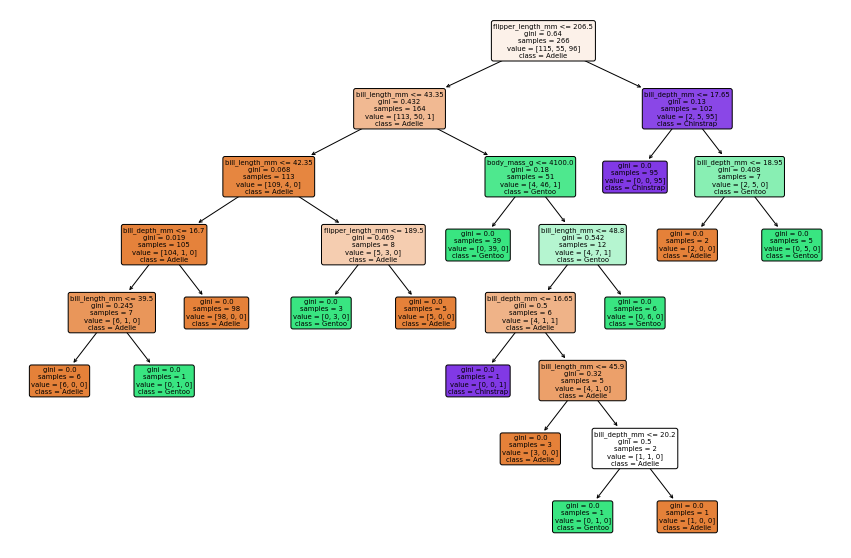

In [13]:
# Importa il modulo dell'albero decisionale da scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Crea un'istanza del modello di albero decisionale
tree_model = DecisionTreeClassifier(random_state=42)

# Addestra il modello sull'insieme di addestramento
tree_model.fit(X_train, y_train)

# Fai predizioni sull'insieme di test
y_pred = tree_model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modello: {accuracy:.2f}')

# Visualizza la matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nMatrice di Confusione:')
print(conf_matrix)

# Visualizza il report di classificazione
class_report = classification_report(y_test, y_pred)
print('\nReport di Classificazione:')
print(class_report)

# Visualizza l'albero decisionale
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_model, feature_names=X.columns, class_names=['Adelie', 'Gentoo','Chinstrap'], filled=True, rounded=True)
plt.show()


Le metriche di qualità sono fondamentali per valutare le prestazioni di un modello di classificazione.

In [14]:
# Calcola e stampa le metriche di qualità del modello
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')

Precision: 1.00
Recall: 1.00
F1 Score: 1.00


1. **Precision (Precisione):**
   - La precisione misura la percentuale di istanze positive predette dal modello che sono realmente positive.
   - Formula: `precision = TP / (TP + FP)`, dove TP è il numero di True Positives e FP è il numero di False Positives.

2. **Recall (Recupero o Sensibilità):**
   - Il recall misura la percentuale di istanze positive reali che sono state predette correttamente dal modello.
   - Formula: `recall = TP / (TP + FN)`, dove TP è il numero di True Positives e FN è il numero di False Negatives.

3. **F1 Score:**
   - L'F1 Score è la media armonica di precision e recall, fornendo una singola metrica che tiene conto di entrambi.
   - Formula: `F1 Score = 2 * (precision * recall) / (precision + recall)`.

**Interpretazione:**
- Una precisione elevata indica che quando il modello predice una classe positiva, è molto probabile che sia corretto.
- Un recall elevato indica che il modello è in grado di individuare la maggior parte delle istanze positive reali.
- L'F1 Score è particolarmente utile quando precisione e recall devono essere bilanciati.

Ricorda che le metriche possono variare a seconda del contesto e degli obiettivi specifici del problema di classificazione. Ad esempio, in un contesto medico, potrebbe essere più critico avere un recall elevato per garantire la rilevazione di tutti i casi positivi.

L'uso di queste metriche ti aiuterà a ottenere una comprensione più approfondita delle prestazioni del tuo modello e a prendere decisioni informate sulla sua efficacia nella risoluzione del problema di classificazione.